## Observations and Insights 

In [1]:
 %matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

In [3]:
# Study data files
mouse_metadata_path = "/Users/Edo/Resources/data_Mouse_metadata.csv"
study_results_path = "/Users/Edo/Resources/data_Study_results.csv"


In [4]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [5]:
# Checking the number of mice.
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
drop_duplicate = study_results.drop_duplicates(subset=['Tumor Volume (mm3)'])
drop_duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
250,a275,5,46.795257,0
251,w575,5,48.913860,1
252,x822,5,45.671104,1
253,l509,5,45.851193,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
getting_duplicate = study_results[study_results.duplicated(subset=['Tumor Volume (mm3)'])]
getting_duplicate


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0
5,h246,0,45.0,0
...,...,...,...,...
245,t565,0,45.0,0
246,i557,0,45.0,0
247,m957,0,45.0,0
248,f966,0,45.0,0


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_mouse = pd.merge(mouse_metadata, drop_duplicate,on = "Mouse ID")
merge_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,5,38.825898,0
1,k403,Ramicane,Male,21,16,10,35.014271,1
2,k403,Ramicane,Male,21,16,15,34.223992,1
3,k403,Ramicane,Male,21,16,20,32.997729,1
4,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1639,z969,Naftisol,Male,9,30,25,63.145652,2
1640,z969,Naftisol,Male,9,30,30,65.841013,3
1641,z969,Naftisol,Male,9,30,35,69.176246,4
1642,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
total_mouse = merge_mouse["Mouse ID"].count()
total_mouse 

1644

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_group = merge_mouse.groupby("Drug Regimen")

Total_tumor_volumen_mean = regimen_group [["Tumor Volume (mm3)"]].mean()
Total_tumor_volumen_median = regimen_group [["Tumor Volume (mm3)"]].median()
Total_tumor_volumen_var = regimen_group [["Tumor Volume (mm3)"]].var()
Total_tumor_volumen_std = regimen_group [["Tumor Volume (mm3)"]].std()
Total_tumor_volumen_sem = regimen_group [["Tumor Volume (mm3)"]].sem()


data = {"Mean":Total_tumor_volumen_mean,
        "Median":Total_tumor_volumen_median,
        "Variance":Total_tumor_volumen_var,
        "Standard Deviation":Total_tumor_volumen_std,
        "SEM":Total_tumor_volumen_sem,
          
}
df = pd.concat(data,axis=1)

df

,Mean,Median,Variance,Standard Deviation,SEM
,Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.171944,40.722503,25.424252,5.042247,0.351310
Ceftamin,53.831559,52.847559,34.725752,5.892856,0.476409
Infubinol,54.173160,53.244458,38.326085,6.190806,0.500497
Ketapril,56.805521,56.098998,60.485143,7.777219,0.609159
Naftisol,55.780565,54.234502,60.794406,7.797077,0.614496
Placebo,55.481270,53.354528,55.762387,7.467422,0.597872
Propriva,53.732821,52.682695,38.160904,6.177451,0.531670
Ramicane,39.627674,39.769552,23.213127,4.818000,0.338157


In [11]:
# Using the aggregation method, produce the same summary statistics in a single line
Total_tumor_volumen_mean = merge_mouse [["Tumor Volume (mm3)"]].mean()
Total_tumor_volumen_median = merge_mouse [["Tumor Volume (mm3)"]].median()
Total_tumor_volumen_var = merge_mouse [["Tumor Volume (mm3)"]].var()
Total_tumor_volumen_std = merge_mouse [["Tumor Volume (mm3)"]].std()
Total_tumor_volumen_sem = merge_mouse [["Tumor Volume (mm3)"]].sem()


data2 = {"Mean":Total_tumor_volumen_mean,
        "Median":Total_tumor_volumen_median,
        "Variance":Total_tumor_volumen_var,
        "Standard Deviation":Total_tumor_volumen_std,
        "SEM":Total_tumor_volumen_sem,
          
}
df2 = pd.concat(data2,axis=1)

df2

,Mean,Median,Variance,Standard Deviation,SEM
Tumor Volume (mm3),51.273592,50.539831,85.926089,9.269633,0.228619


## Bar and Pie Charts

<IPython.core.display.Javascript object>


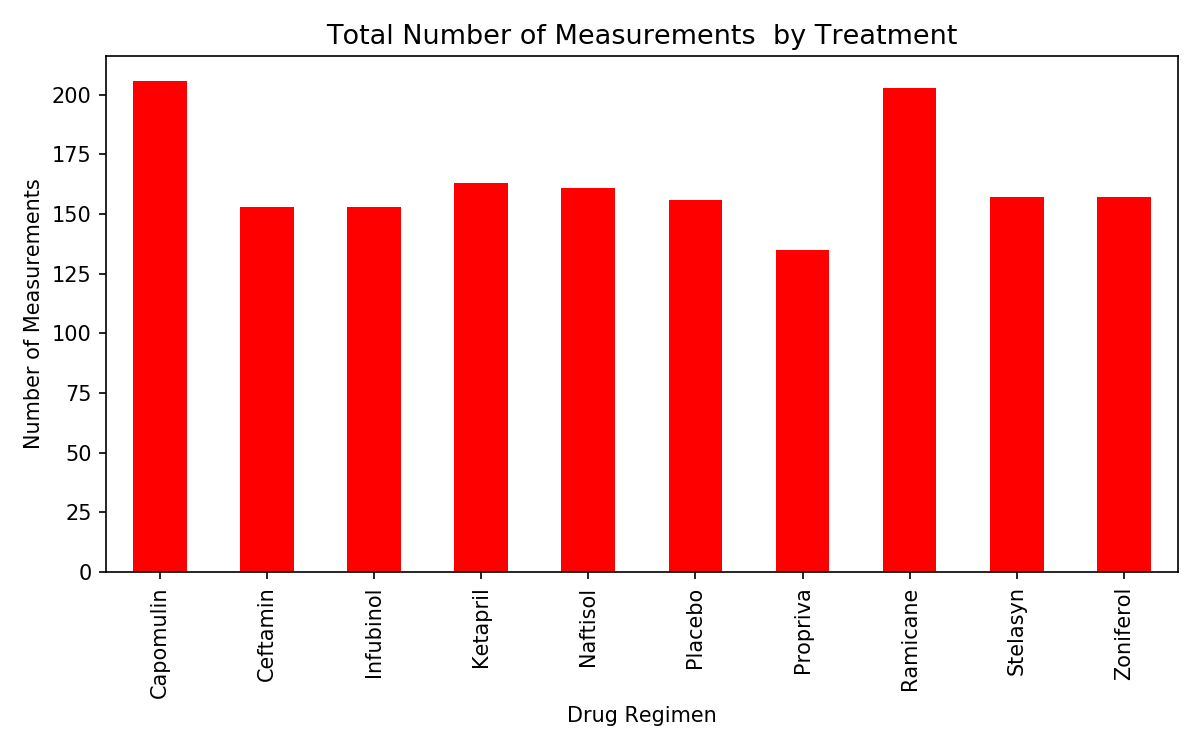

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

Total_regimen_group = merge_mouse.groupby("Drug Regimen").count()["Mouse ID"] 

Bar_plot = Total_regimen_group.plot.bar(figsize=(8,5), color='r',fontsize = 10)
plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Measurements",fontsize = 10)
plt.title("Total Number of Measurements  by Treatment",fontsize = 13)

plt.tight_layout()
plt.show()

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

Total_sex_group = merge_mouse.groupby(["Mouse ID","Sex"])

sex_gender_df = pd.DataFrame(Total_sex_group.size())

mouse_gender = pd.DataFrame(sex_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

mouse_gender 


,Total Count,Percentage of Sex
Sex,,
Female,117,49.367089
Male,120,50.632911


<IPython.core.display.Javascript object>


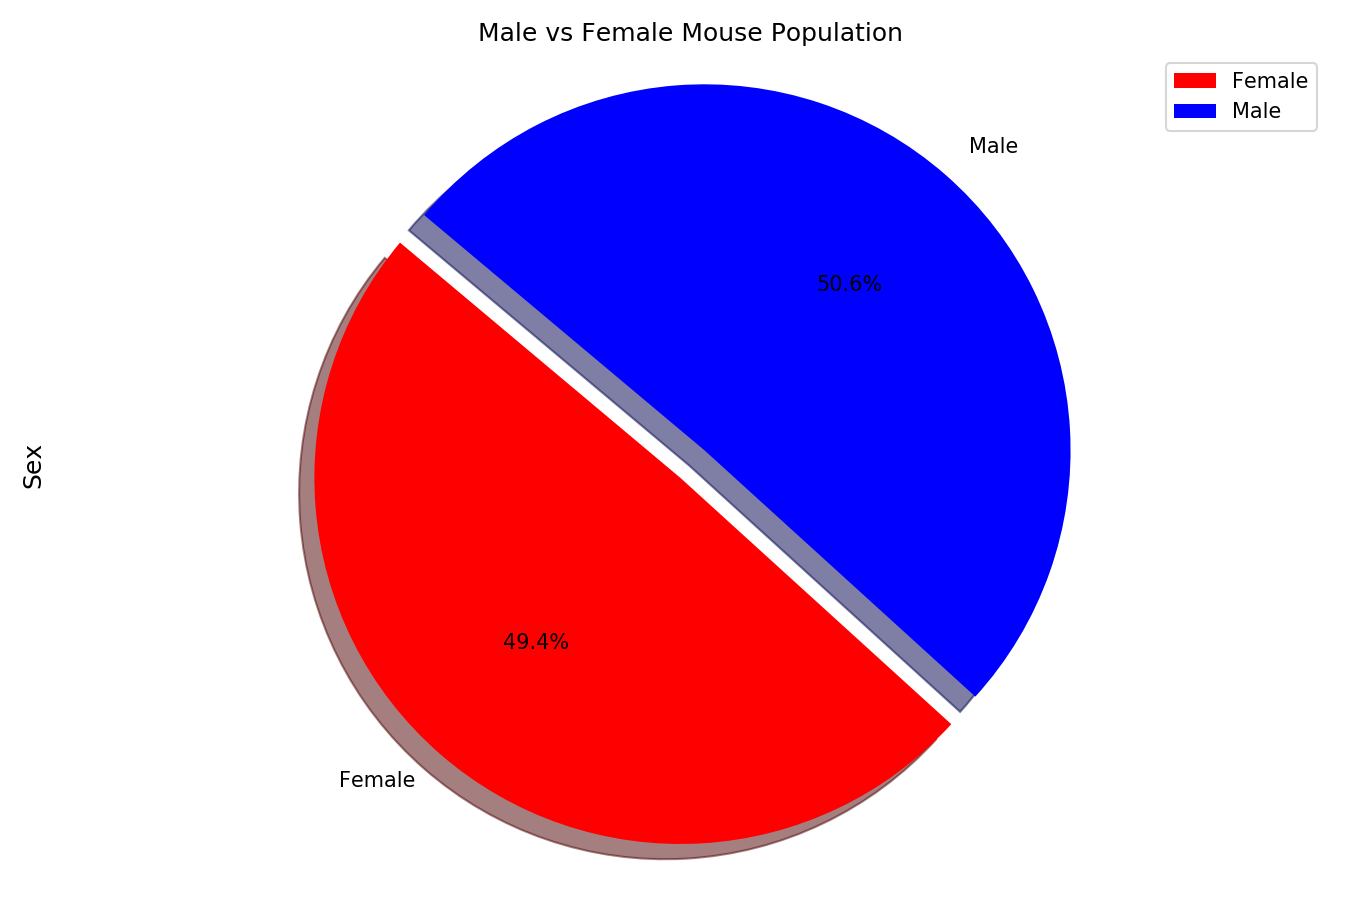

In [16]:
colors = ['red', 'blue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(9,6), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 12)
plt.ylabel('Sex',fontsize = 12)
plt.axis("equal",fontsize = 12)

plt.tight_layout()
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
